In [ ]:
import pandas as pd
df=pd.read_csv("/content/fetal_health.csv")

In [ ]:
df

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [ ]:
df.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [ ]:
X=df.iloc[:,:21]
y=df["fetal_health"]
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error: 0.16
R-squared: 0.54
Mean Absolute Error (MAE): 0.28


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score,classification_report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred,y_test), 2) * 100
print("Accuracy :" ,acc_knn)

Accuracy : 87.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc_logreg2 = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy : ",acc_logreg2)

Accuracy :  95.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
acc_dt = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Accuracy: ", acc_dt)

Accuracy:  92.25


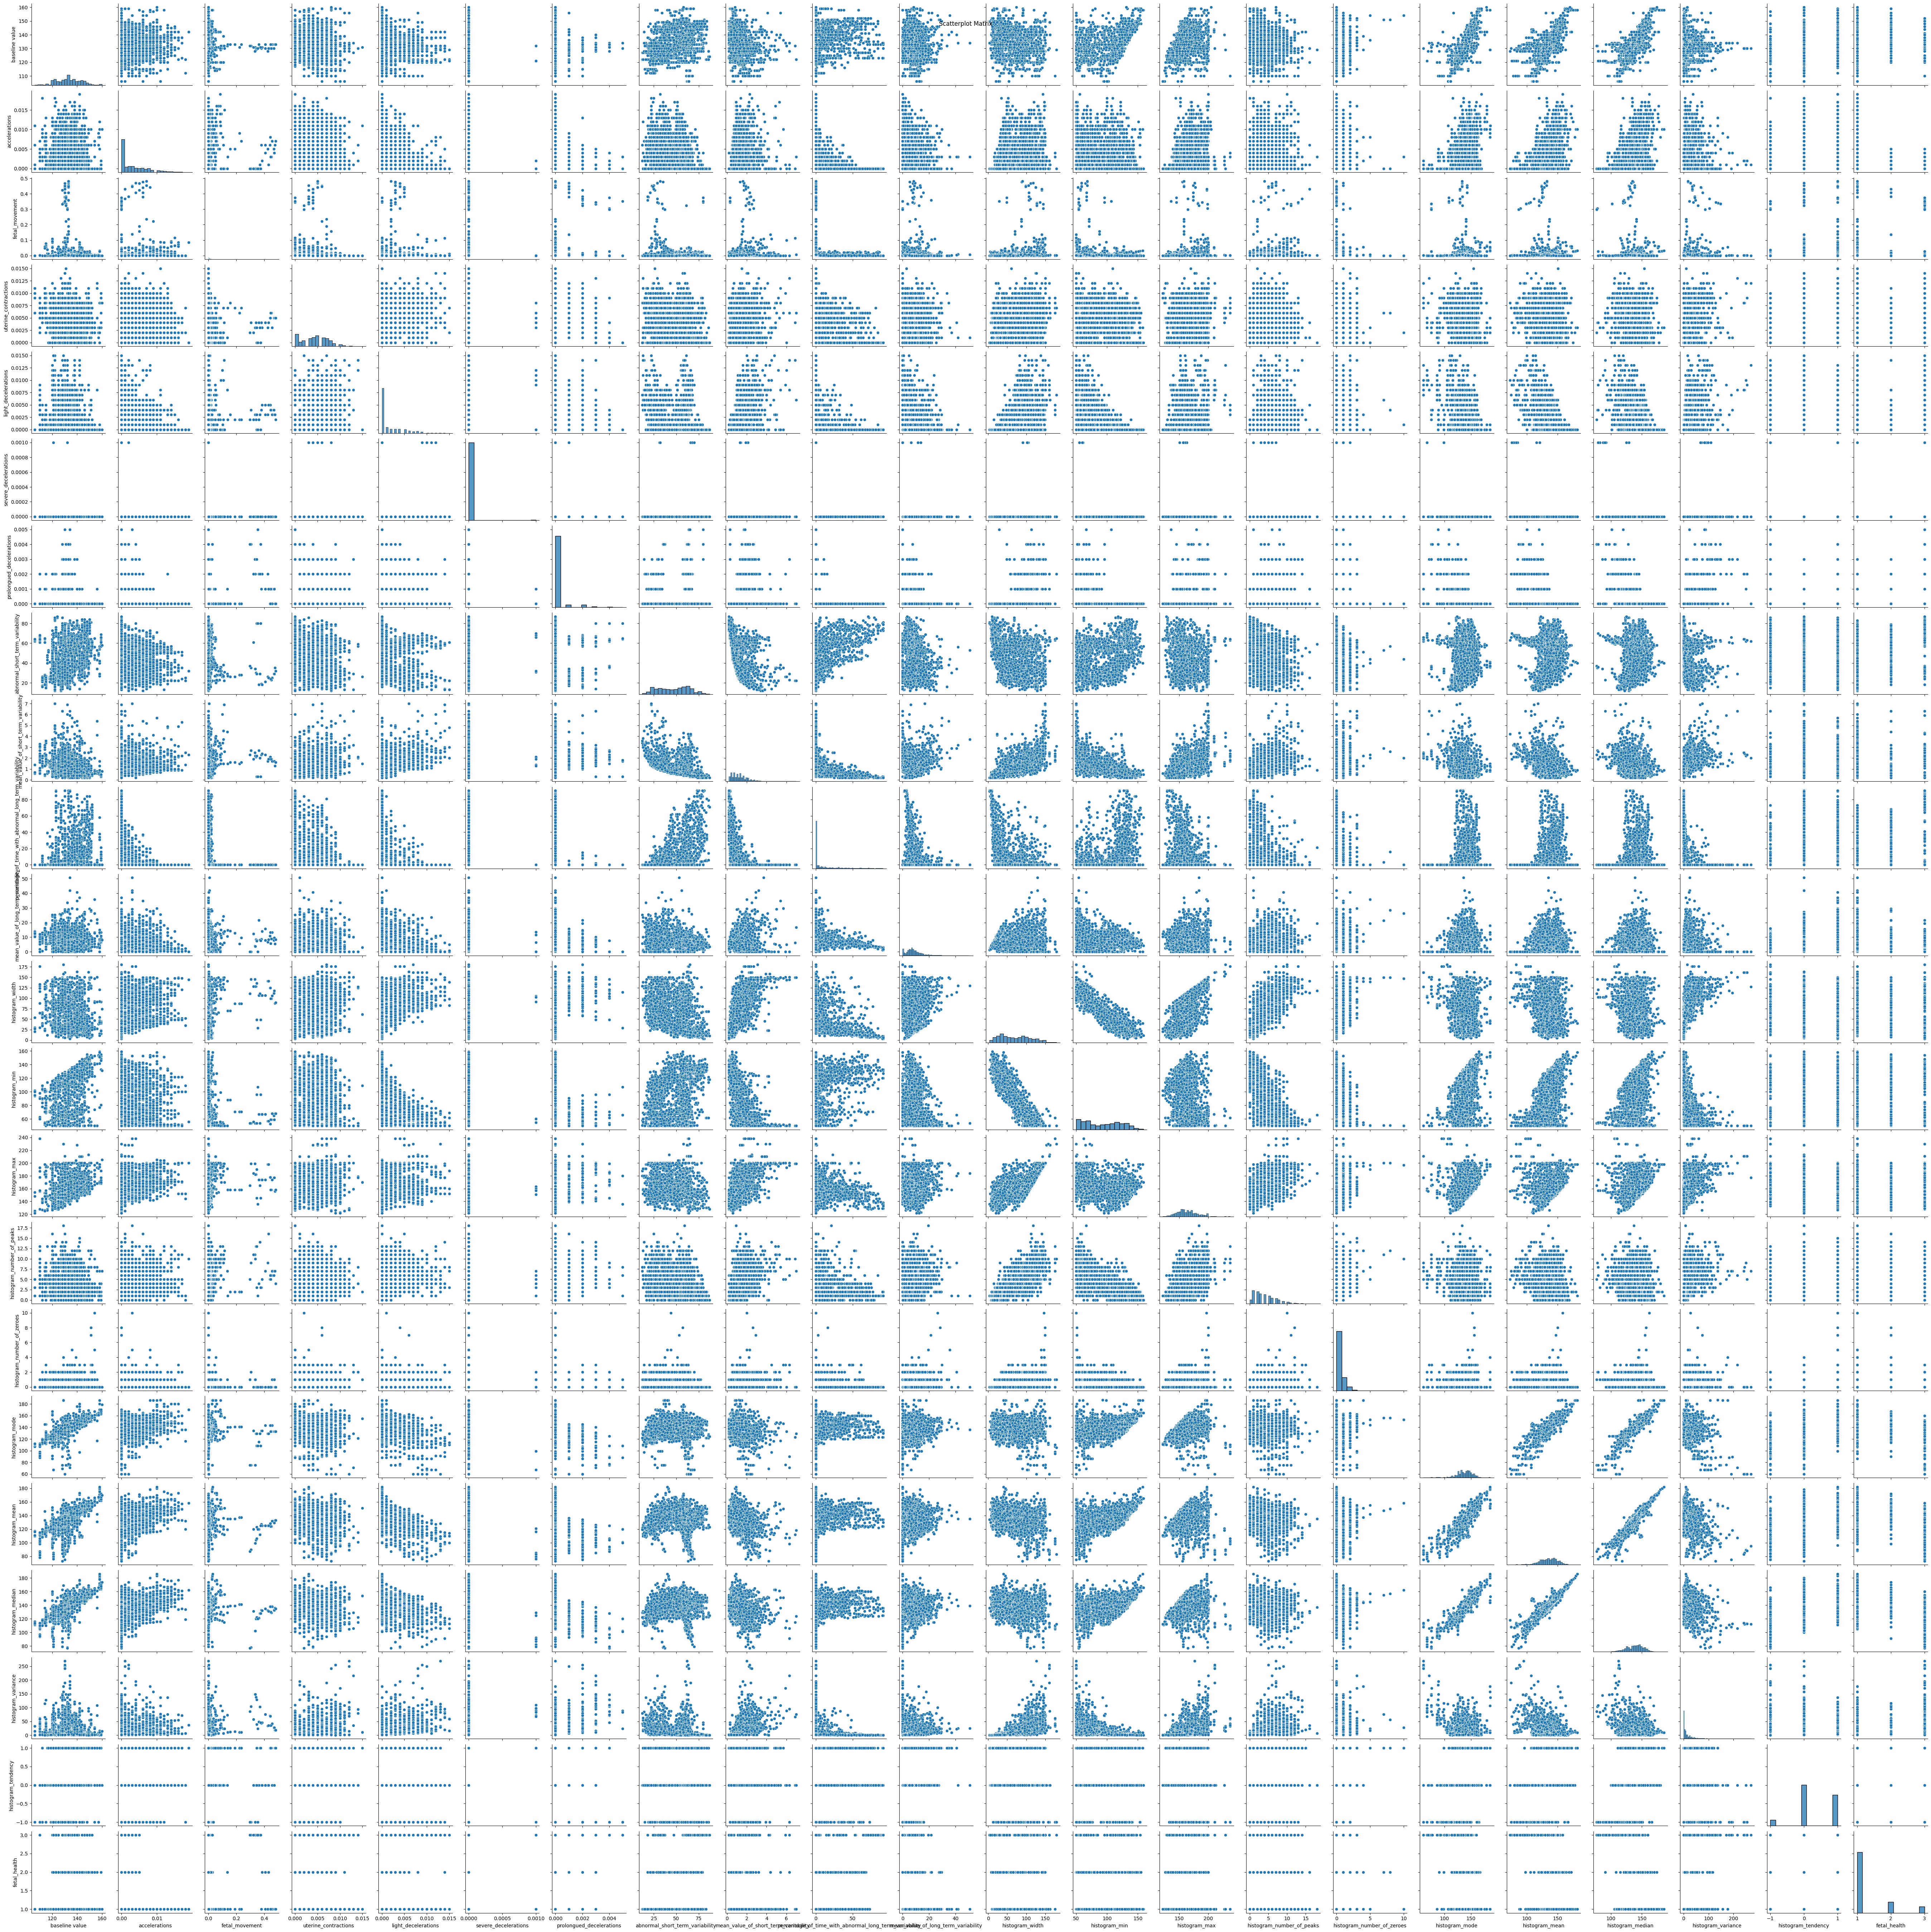

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind="scatter", markers="o")
plt.suptitle("Scatterplot Matrix")
plt.show()
